<a href="https://colab.research.google.com/github/bwilli2086/data_analytics/blob/main/Python%5CUnit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

**1. Analyze the dataset**
1.Provide your observation and conclusions




In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.shape

(397, 7)

In [16]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [17]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [18]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


This file has a total of 397 rows and 7 columns. the name of the columns are: Unnamed: 0,	rank,	discipline,	yrs.since.phd,	yrs.service,	sex,	salary. The count shows that data was inputted for all columns on the 397 rows. average years since phd 22.314, avg years of service 17,614, average salary $113,706.46.

# Mean/median of all salaries


1.   Find the Mean and Median of all Salaries
2.  Provide your findings



In [19]:
# Mean of all salaries
df_mean=df[['salary']].mean()
df_mean

salary    113706.458438
dtype: float64

***The Mean of all Salaries is $113,706.46***

In [20]:
# Median of all salaries
df_median=df[['salary']].median()
df_median

salary    107300.0
dtype: float64

***Median of all salaries is $107,300.00***

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [21]:
columns_to_be_drop=['Unnamed: 0','rank','discipline','yrs.since.phd','yrs.service']
type(columns_to_be_drop)

list

In [23]:
new_df=df.drop(columns_to_be_drop,axis=1)
new_df

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [24]:
new_df
new_df.groupby('sex')[['salary']].median()

,salary
sex,
Female,103750
Male,108043


***Median salary for all males is $108,043.00***

Finding the Median salary for all females

In [25]:
new_df
new_df.groupby('sex')[['salary']].median()

,salary
sex,
Female,103750
Male,108043


***Median salary for all females is $103,750.00***

Comparing the Mean salary of Males and Females

In [26]:
new_df
new_df.groupby('sex')[['salary']].mean()

,salary
sex,
Female,101002.410256
Male,115090.418994


In [27]:
# The difference between mean salaries of male and female
new_df.groupby('sex').describe()

salary                               ...                               
        count           mean           std  ...       50%        75%       max
sex                                         ...                               
Female   39.0  101002.410256  25952.127317  ...  103750.0  117002.50  161101.0
Male    358.0  115090.418994  30436.927344  ...  108043.0  134863.75  231545.0

[2 rows x 8 columns]

***Finding: There are a total of 39 Female Salaries and 358 Male. Males make on average more than Females according to the data by about $14,000 or 14% more. The data also shows that male min salaries is 9% higher than female min salaries and male max salaries is 44% higher than female max salaries.***

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [28]:
df_filter_more=df[df['yrs.service'] >= 20]
df_filter_more


,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
...,...,...,...,...,...,...,...
384,385,Prof,A,27,21,Male,125192
386,387,Prof,A,29,27,Male,139219
388,389,Prof,A,38,36,Male,119450
392,393,Prof,A,33,30,Male,103106


In [29]:
df_filter_mean=df_filter_more[['salary']].mean()
df_filter_mean

salary    122520.656051
dtype: float64

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [30]:
df_filter_less=df[df['yrs.service'] < 20]
df_filter_less

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
5,6,AssocProf,B,6,6,Male,97000
9,10,Prof,B,18,18,Female,129000
...,...,...,...,...,...,...,...
390,391,Prof,A,40,19,Male,166605
391,392,Prof,A,30,19,Male,151292
393,394,Prof,A,31,19,Male,150564
395,396,Prof,A,25,15,Male,95329


In [31]:
df_filter_more=df[df['yrs.service'] >= 20]
df_filter_more

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
...,...,...,...,...,...,...,...
384,385,Prof,A,27,21,Male,125192
386,387,Prof,A,29,27,Male,139219
388,389,Prof,A,38,36,Male,119450
392,393,Prof,A,33,30,Male,103106


In [33]:
df_filter_more.groupby('rank').describe()

Unnamed: 0                         ...    salary                    
               count       mean         std  ...       50%       75%       max
rank                                         ...                              
AssocProf       10.0  210.50000   78.607676  ...   85200.0   92563.5  106300.0
Prof           147.0  213.47619  119.186589  ...  122875.0  143995.0  231545.0

[2 rows x 32 columns]

In [34]:
df_filter_less.groupby('rank').describe()

Unnamed: 0                          ...    salary                     
               count        mean         std  ...       50%        75%       max
rank                                          ...                               
AssocProf       54.0  174.148148  106.302418  ...   98878.5  104436.75  126431.0
AsstProf        67.0  169.761194  112.097372  ...   79800.0   88597.50   97032.0
Prof           119.0  207.890756  113.651697  ...  124312.0  146650.00  204000.0

[3 rows x 32 columns]

***People who work more than 20 years make on average more than people who work less than 20 years. it is also discovered that Assistant Professors work less than 20 years in that rank. it could mean that they either leave the role or promoted to a higher position in the time frame. There are more people who has been with the company less than 20 years compared to those that are more. There is a total of 157 that worked for more than 20 years and 240 that worked for less than 20 years.***

People who have salary of greater than or equal to 200,000

In [37]:
df_salary_more=df[df['salary'] >= 200000]
df_salary_more

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...
***There are only 3 people making more than 200,000. 2 have worked more than 30 years with the company. 1 stands out because they only worked 7 years but had their PHD for 29 years, which can explain their pay based on their experience. Lastly there are no females making over $200k.***

# Rename values, subset columns, etc

In [39]:
# Replace a value in a column
df


,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [88]:
# Replace a value in a column
df_replaceval=df
df_replaceval=df_replaceval['title'].replace(['AsstProf'],'Assistant Prof')
df_replaceval



0                Prof
1                Prof
2      Assistant Prof
3                Prof
4                Prof
            ...      
392              Prof
393              Prof
394              Prof
395              Prof
396    Assistant Prof
Name: title, Length: 397, dtype: object

In [84]:
#Rename Columns
df_replacecol=df.rename(columns={'rank':'title'})
df_replacecol

,Unnamed: 0,title,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

(array([ 33.,  78., 103.,  64.,  50.,  37.,  20.,   9.,   2.,   1.]),
 array([ 57800. ,  75174.5,  92549. , 109923.5, 127298. , 144672.5,
        162047. , 179421.5, 196796. , 214170.5, 231545. ]),
 <a list of 10 Patch objects>)

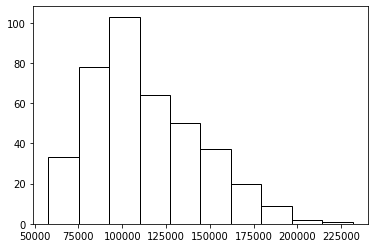

In [89]:

plt.hist(df['salary'],bins=10,fill=False)

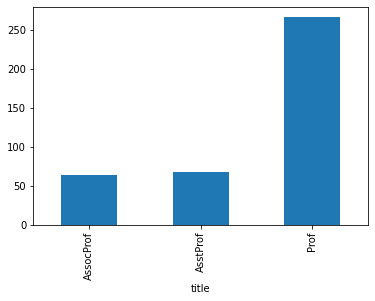

In [90]:
df
df.groupby(['title'])['salary'].count().plot(kind='bar')

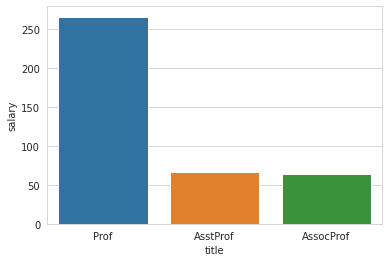

In [92]:
sns.set_style("whitegrid")

ax = sns.barplot(x='title',y ='salary', data=df, estimator=len)

Your observations from the visuals: 
There are more Professor than any other titles. The most frequent occurrence of salary value is 100k, with over 100 people making 100k.

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...
I discovered that there is a pay discrepancy between male and female employees. Where male employee makes more than female employees. The years of service(employment) also effects the persons pay rate. those working more than 20 years usually get paid more than those working less. There are only 3 employees making over 200k.

I also discovered that the -
I also discover that there are 3 titles for the employees of this company. Assistant Professor, Associate professor, and Professor. 
 Your Findings here...
 The most employee are professors, with over 250 total count and Assistant Professor last a max of 11 years in that position.





In [94]:
df.groupby('title').describe()

Unnamed: 0                          ...    salary                     
               count        mean         std  ...       50%        75%       max
title                                         ...                               
AssocProf       64.0  179.828125  102.792217  ...   95626.5  104226.25  126431.0
AsstProf        67.0  169.761194  112.097372  ...   79800.0   88597.50   97032.0
Prof           266.0  210.977444  116.557830  ...  123321.5  145080.50  231545.0

[3 rows x 32 columns]